In [ ]:
import os

if not os.getcwd().endswith("src"):
    %cd ..
%pwd

/home/xqz-u/master/FACT/FACT/src


'/home/xqz-u/master/FACT/FACT/src'

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

import config
import plot
import sources_of_envy

/home/xqz-u/py_envs/FACT/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/xqz-u/py_envs/FACT/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: CUDA driver version is insufficient for CUDA runtime version (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(


In [ ]:
metrics = sources_of_envy.do_envy_from_mispecification()

In [ ]:
df = pd.concat(
    [pd.DataFrame(vals).assign(dataset=dataset) for dataset, vals in metrics.items()]
)
df

,mean_envy,prop_eps_envy,dataset
64,0.017805,0.000000,lastfm
256,0.019420,0.004228,lastfm
4,0.026027,0.000000,lastfm
8,0.020739,0.000000,lastfm
128,0.018643,0.000000,lastfm
32,0.016648,0.000000,lastfm
2,0.024371,0.000000,lastfm
1,0.020557,0.000000,lastfm
16,0.017279,0.000000,lastfm
64,0.000430,0.000000,movielens


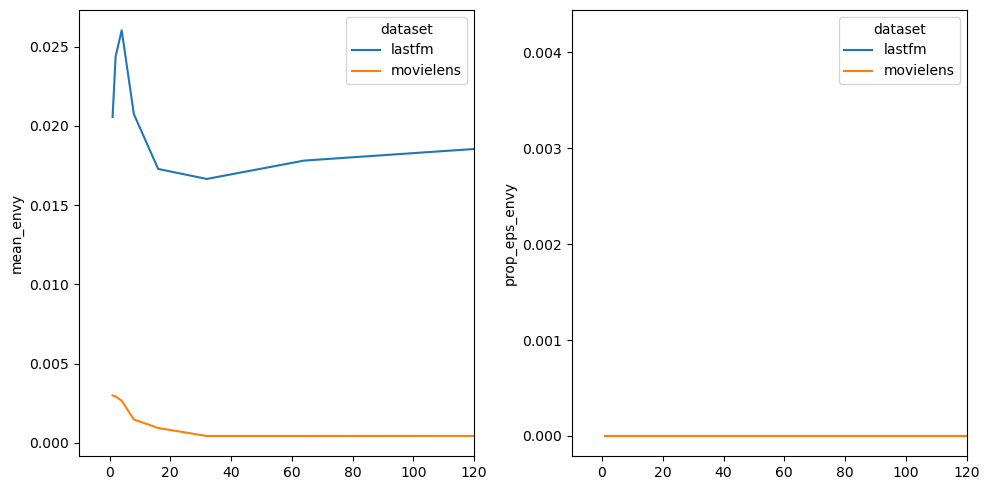

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# sns.pointplot(data=df, x=df.index, y="mean_envy", hue="dataset", linestyles=["-", "--"], ax=axes[0])
sns.lineplot(data=df, x=df.index, y="mean_envy", hue="dataset", ax=axes[0])
axes[0].set_xlim(-10, 120)
# sns.pointplot(data=df, x=df.index, y="prop_eps_envy", hue="dataset", linestyles=["-", "--"], ax=axes[1])
sns.lineplot(data=df, x=df.index, y="prop_eps_envy", hue="dataset", ax=axes[1])
axes[1].set_xlim(-10, 120)
plt.tight_layout()